## Machine Learning Model

Here is where I have done my feature engineering & made my machine learning model.

Objective --> Finding out an optimal & robust model that would predict the modal price for the given dataset

Firstly , I have imported the csv file using pandas

In [60]:
import pandas as pd
import numpy as np
import sklearn

In [61]:
df = pd.read_csv(r'C:\Users\Rohan\Projects\Gramworks\agri_data_updated.csv')
df

,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date,Year,Month
0,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,2020-12-09,2020,12
1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,2020-11-20,2020,11
2,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,2020-04-07,2020,4
3,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,2020-03-12,2020,3
4,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,2020-03-06,2020,3
...,...,...,...,...,...,...,...,...,...,...,...
35539,Udupi,Udupi,Tomato,Tomato,Medium,1000,1400,1200,2015-01-28,2015,1
35540,Udupi,Udupi,Tomato,Tomato,FAQ,1000,1400,1200,2015-01-28,2015,1
35541,Udupi,Udupi,Tomato,Tomato,FAQ,1500,1900,1700,2015-01-21,2015,1
35542,Udupi,Udupi,Tomato,Tomato,FAQ,1400,1800,1600,2015-01-14,2015,1


Now let us see the different categories in our dataset 

In [62]:
cols = df.columns
num_cols = df._get_numeric_data().columns
num_cols

Index(['Min_Price', 'Max_Price', 'Modal_Price', 'Year', 'Month'], dtype='object')

In [63]:
list(set(cols) - set(num_cols))

['Grade', 'Commodity', 'Market_Name', 'District_Name', 'Price_Date', 'Variety']

So these are the different categorical values in our dataset. Obviously, the date won't be considered. So let us change these categorical columns & perform label encoding so we can visualize the correlations.

In [64]:
replicate_df = df

In [65]:
df_col = ['District_Name','Commodity', 
          'Market_Name', 'Grade', 'Variety', 'Year']      # Columns that can be label encoded

#import label encoder 
from sklearn import preprocessing 

for i in range(len(df_col)):
    
    replicate_df[df_col[i]] = label_encoder.fit_transform(replicate_df[df_col[i]]) 

I will use the replicate_df version for modelling

In [66]:
replicate_df

,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Price_Date,Year,Month
0,9,0,0,1,0,1000,1000,1000,2020-12-09,5,12
1,9,0,0,1,0,1000,1000,1000,2020-11-20,5,11
2,9,0,0,1,0,750,750,750,2020-04-07,5,4
3,9,0,0,1,0,1500,1500,1500,2020-03-12,5,3
4,9,0,0,1,0,1500,1500,1500,2020-03-06,5,3
...,...,...,...,...,...,...,...,...,...,...,...
35539,19,58,0,1,2,1000,1400,1200,2015-01-28,0,1
35540,19,58,0,1,0,1000,1400,1200,2015-01-28,0,1
35541,19,58,0,1,0,1500,1900,1700,2015-01-21,0,1
35542,19,58,0,1,0,1400,1800,1600,2015-01-14,0,1


In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

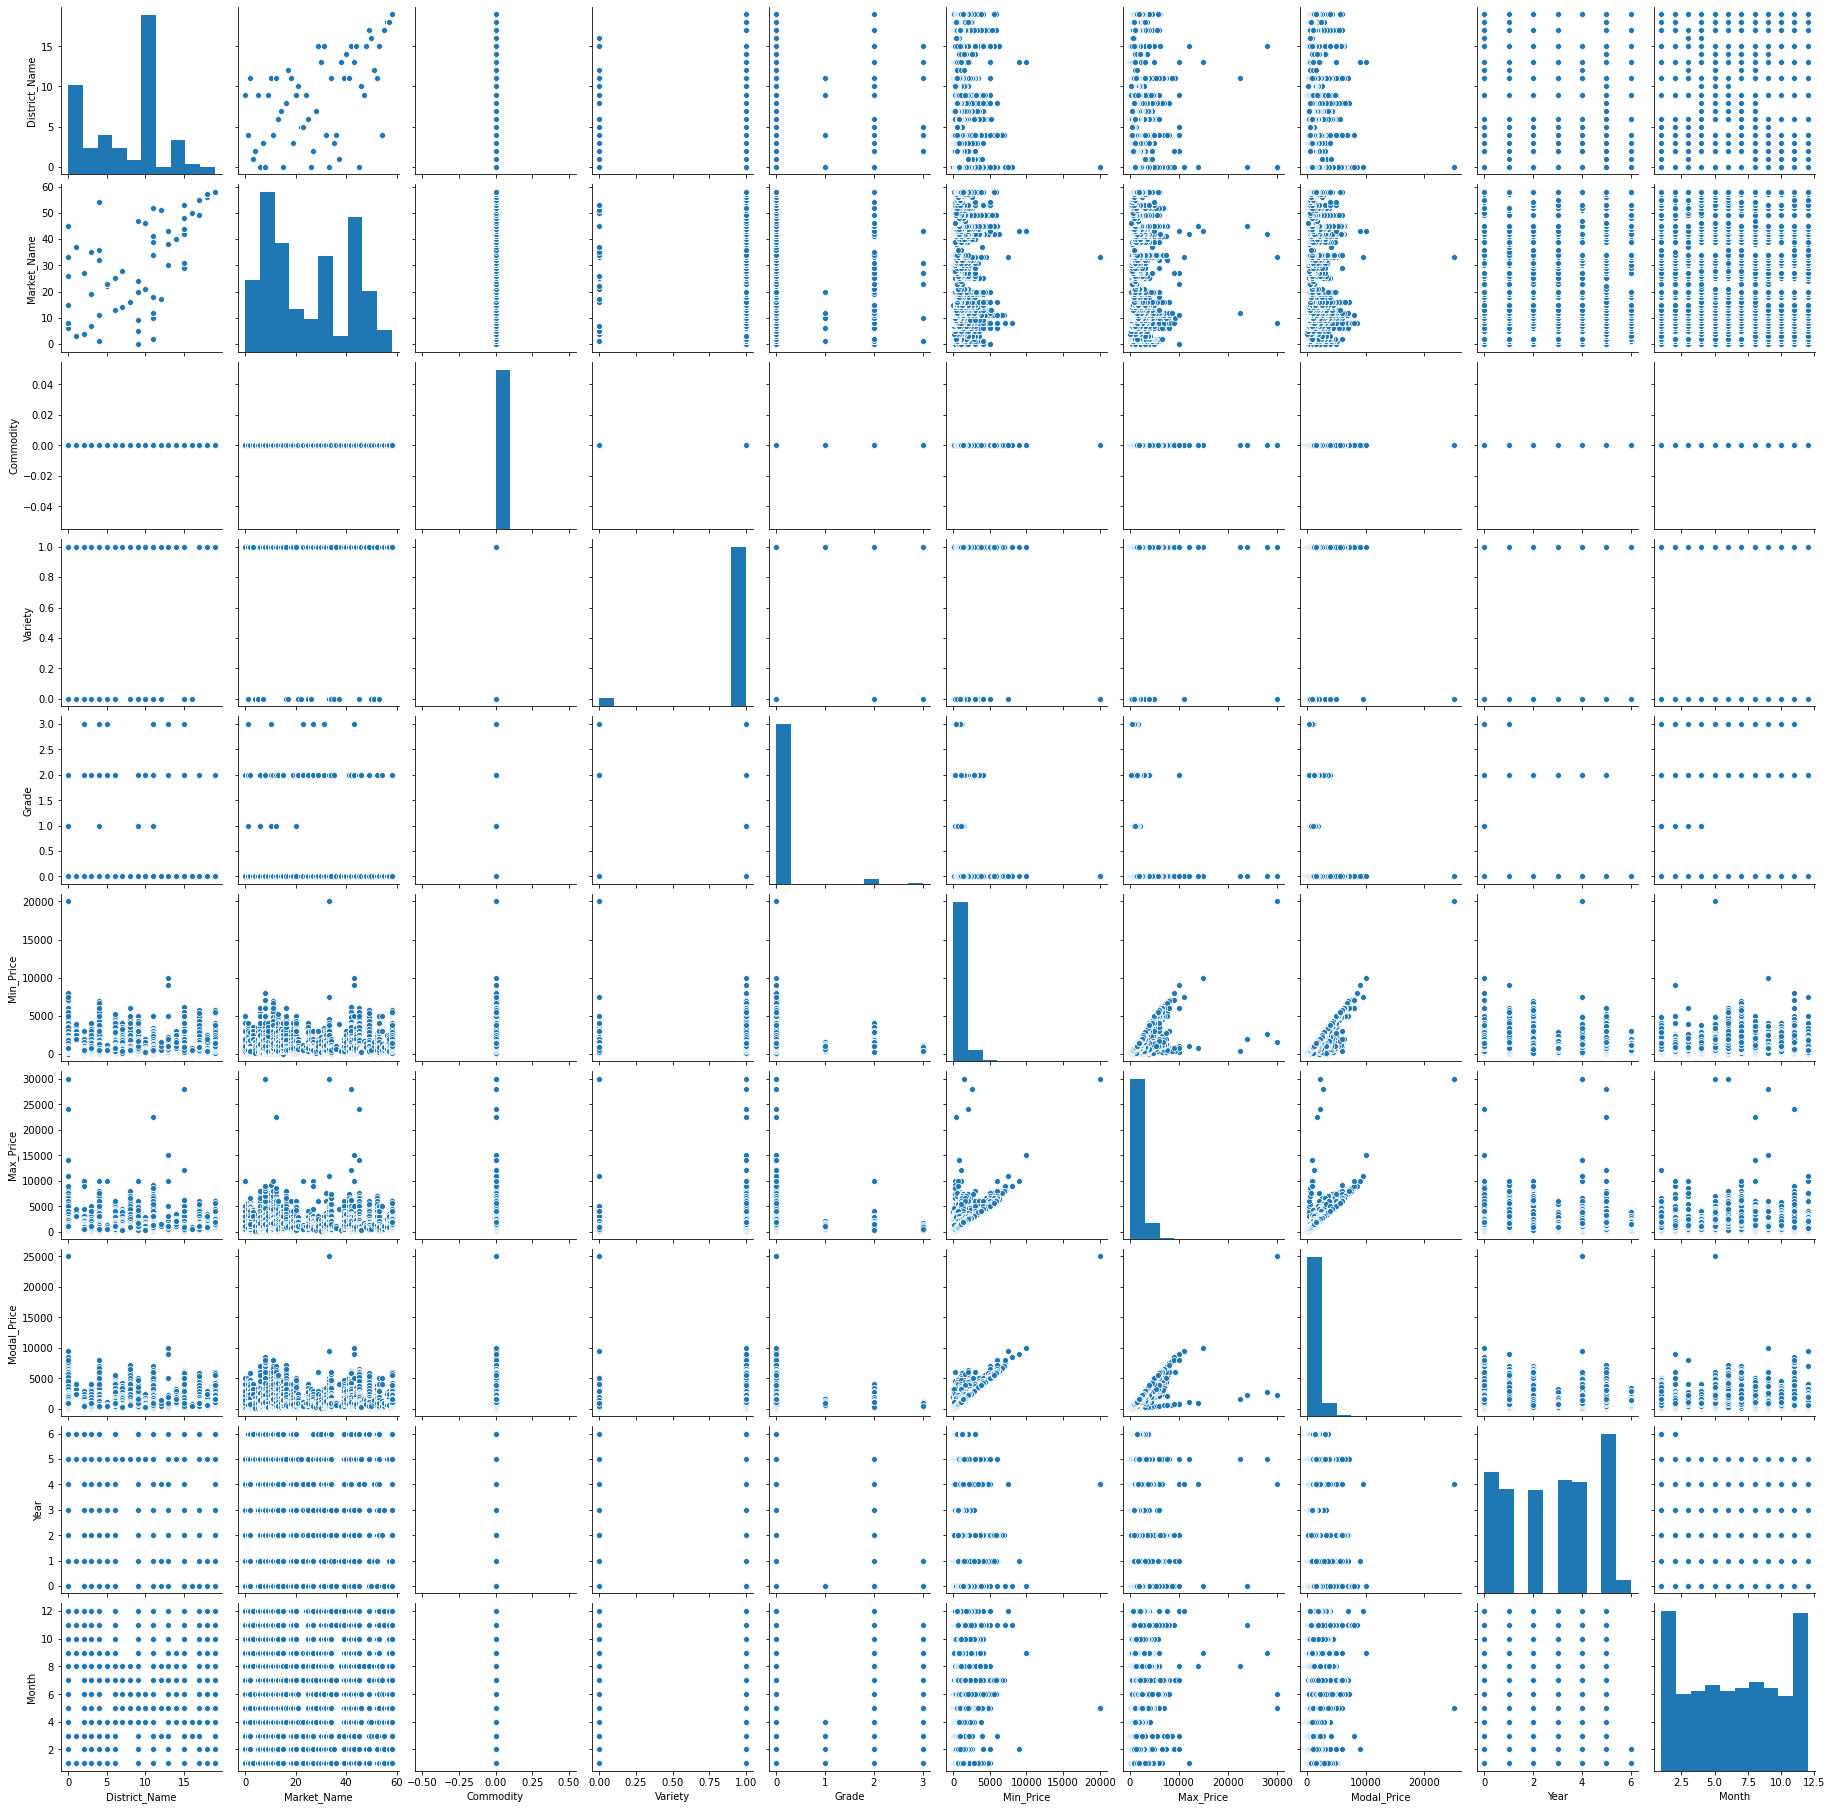

In [68]:
sns.pairplot(replicate_df)

We can also use the corr() function 

In [69]:
corr = replicate_df.corr()
corr

,District_Name,Market_Name,Commodity,Variety,Grade,Min_Price,Max_Price,Modal_Price,Year,Month
District_Name,1.000000,0.454131,NaN,-0.038517,-0.065364,-0.183879,-0.002180,-0.072722,0.004130,0.016340
Market_Name,0.454131,1.000000,NaN,-0.113388,-0.001579,0.005515,0.021931,-0.001030,-0.003160,0.011956
Commodity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Variety,-0.038517,-0.113388,NaN,1.000000,-0.023608,-0.000372,0.001550,0.003941,-0.129425,0.017757
Grade,-0.065364,-0.001579,NaN,-0.023608,1.000000,-0.021849,-0.082173,-0.062964,-0.069896,-0.031865
Min_Price,-0.183879,0.005515,NaN,-0.000372,-0.021849,1.000000,0.703324,0.876739,0.042917,0.104296
Max_Price,-0.002180,0.021931,NaN,0.001550,-0.082173,0.703324,1.000000,0.917204,0.051021,0.142400
Modal_Price,-0.072722,-0.001030,NaN,0.003941,-0.062964,0.876739,0.917204,1.000000,0.032770,0.135885
Year,0.004130,-0.003160,NaN,-0.129425,-0.069896,0.042917,0.051021,0.032770,1.000000,-0.052366
Month,0.016340,0.011956,NaN,0.017757,-0.031865,0.104296,0.142400,0.135885,-0.052366,1.000000


We can see this further using heatmaps

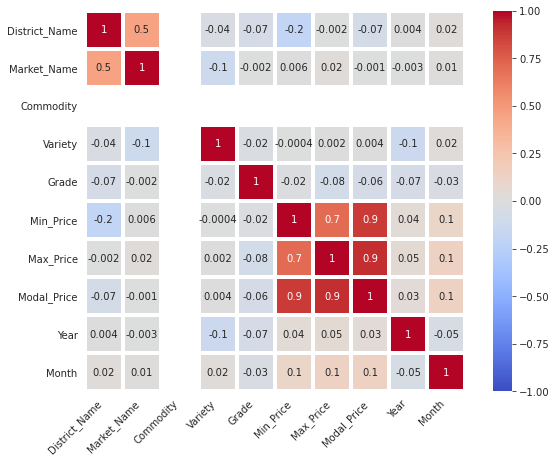

In [70]:
with sns.axes_style("white"):
    
    f, ax = plt.subplots(figsize=(10, 7))
    #ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)
    

    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap= 'coolwarm',
        square=True,
    annot = True, fmt='.1g',
    linewidths=3, linecolor='white')

    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right')


We are looking to predict the modal price , so let us specifically look at relationships for that

In [71]:
corrs_of_modal_price = (corr["Modal_Price"])

In [72]:
corrs_of_modal_price

District_Name   -0.072722
Market_Name     -0.001030
Commodity             NaN
Variety          0.003941
Grade           -0.062964
Min_Price        0.876739
Max_Price        0.917204
Modal_Price      1.000000
Year             0.032770
Month            0.135885
Name: Modal_Price, dtype: float64

 As we can see , the only columns that are correlated to Modal_Price are --> 
 
 1) MinPrice
 
 2) Max Price

## Machine Learning Model

Considering the fact that the target variable is a continous type , I am going to be applying three ML models here 

1) Random Forest

2) Linear Regression


### Random Forest

In [73]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn import model_selection

from sklearn.metrics import mean_absolute_error 
from sklearn import metrics

## Using Only Min & Max Price

In [74]:
model_df = replicate_df[['Min_Price' , 'Max_Price','Modal_Price']]

In [75]:
model_df

,Min_Price,Max_Price,Modal_Price
0,1000,1000,1000
1,1000,1000,1000
2,750,750,750
3,1500,1500,1500
4,1500,1500,1500
...,...,...,...
35539,1000,1400,1200
35540,1000,1400,1200
35541,1500,1900,1700
35542,1400,1800,1600


In [76]:
train = model_df[['Min_Price' , 'Max_Price']]
train

,Min_Price,Max_Price
0,1000,1000
1,1000,1000
2,750,750
3,1500,1500
4,1500,1500
...,...,...
35539,1000,1400
35540,1000,1400
35541,1500,1900
35542,1400,1800


Splitting the targer variable from the dataframe

In [77]:
X = train.values
y = model_df.iloc[: , -1].values

Now , splitting our data intro train & test data sets

In [78]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.25, random_state = 14)

In [79]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  65.1638479129913


In [80]:
import pickle

In [81]:
pickle.dump(model, open('model.pkl','wb'))

Storing our model with pickle

In [82]:
# Loading model to compare the results
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[1000 , 1500]]))

[1235.11067234]


## Using Month , Min_Price , Max_Price

In [83]:
model_df = replicate_df[['Min_Price' , 'Max_Price' ,'Month' ,'Modal_Price']]

In [84]:
model_df

,Min_Price,Max_Price,Month,Modal_Price
0,1000,1000,12,1000
1,1000,1000,11,1000
2,750,750,4,750
3,1500,1500,3,1500
4,1500,1500,3,1500
...,...,...,...,...
35539,1000,1400,1,1200
35540,1000,1400,1,1200
35541,1500,1900,1,1700
35542,1400,1800,1,1600


We one hot encode the months since it is a categorical variable

In [85]:
one_hot_encoded_training_predictors = pd.get_dummies(model_df['Month'])

In [86]:
one_hot_encoded_training_predictors

,1,2,3,4,5,6,7,8,9,10,11,12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35539,1,0,0,0,0,0,0,0,0,0,0,0
35540,1,0,0,0,0,0,0,0,0,0,0,0
35541,1,0,0,0,0,0,0,0,0,0,0,0
35542,1,0,0,0,0,0,0,0,0,0,0,0


In [87]:
prices = model_df[['Min_Price' , 'Max_Price']]
prices

,Min_Price,Max_Price
0,1000,1000
1,1000,1000
2,750,750
3,1500,1500
4,1500,1500
...,...,...
35539,1000,1400
35540,1000,1400
35541,1500,1900
35542,1400,1800


In [88]:
train = pd.concat([prices,one_hot_encoded_training_predictors ], axis=1)

In [89]:
train

,Min_Price,Max_Price,1,2,3,4,5,6,7,8,9,10,11,12
0,1000,1000,0,0,0,0,0,0,0,0,0,0,0,1
1,1000,1000,0,0,0,0,0,0,0,0,0,0,1,0
2,750,750,0,0,0,1,0,0,0,0,0,0,0,0
3,1500,1500,0,0,1,0,0,0,0,0,0,0,0,0
4,1500,1500,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35539,1000,1400,1,0,0,0,0,0,0,0,0,0,0,0
35540,1000,1400,1,0,0,0,0,0,0,0,0,0,0,0
35541,1500,1900,1,0,0,0,0,0,0,0,0,0,0,0
35542,1400,1800,1,0,0,0,0,0,0,0,0,0,0,0


In [90]:
X = train.values
y = model_df.iloc[: , -1].values

In [91]:
X[0]

array([1000, 1000,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    1], dtype=int64)

In [92]:
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.25, random_state = 14)

In [93]:
model = RandomForestRegressor()
model.fit(train_X,train_y)

# Get the mean absolute error on the validation data
predicted_prices = model.predict(val_X)
MAE = mean_absolute_error(val_y , predicted_prices)
print('Random forest validation MAE = ', MAE)

Random forest validation MAE =  62.694076624029215


## Linear Regression

Seperating our Train & Test 

In [94]:
X = replicate_df.iloc[:, 5:7].values
y = replicate_df.iloc[:, -4].values

In [95]:
y[0]

1000

In [96]:
y.shape

(35544,)

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [98]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [99]:
regressor = LinearRegression(n_jobs = 500)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=500)

In [100]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 500, 'normalize': False}

In [101]:
print(regressor.intercept_)

1205.2310181114826


In [102]:
print(regressor.coef_)

[418.80468615 555.27328133]


In [103]:
y_pred = regressor.predict(X_test)


In [104]:
y_pred

array([1284.75154378,  468.85185235, 1824.43975728, ...,  707.4574501 ,
        521.213631  ,  511.93231281])

Predicting our Results

In [105]:
yPrediction = regressor.predict(X_test)

In [106]:
print(len(X_train))
print(len(y_test))

28435
7109


In [107]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yPrediction))

Mean Absolute Error: 79.54266707463513


Not such a great result , let us try adding one more feature (Months) to the feature variables

In [108]:
features_2 = ['Min_Price' , 'Max_Price' , 'Month']
X = replicate_df[features_2].values
y = replicate_df.iloc[:, -4].values

In [109]:
X[0]

array([1000, 1000,   12], dtype=int64)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [111]:
regressor = LinearRegression(n_jobs = 500)
regressor.fit(X_train, y_train)

LinearRegression(n_jobs=500)

In [112]:
y_pred = regressor.predict(X_test)

In [113]:
yPrediction = regressor.predict(X_test)

In [114]:
yPrediction

array([1288.28234999,  467.11946742, 1826.19932082, ...,  709.69968957,
        518.64967228,  508.48133071])

In [115]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yPrediction))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, yPrediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, yPrediction)))

Mean Absolute Error: 79.52920056019781
Mean Squared Error: 57662.547596837605
Root Mean Squared Error: 240.13027213751624


####  The best model is given by our Random Forest Regressor so we will be using that model for our prediction when we deploy our web app

In [116]:
pip install notebook-as-pdf

  Using cached websockets-8.1-cp38-cp38-win_amd64.whl (66 kB)
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61087 sha256=46f1271cb611db7437a2aef9981de05e2f71cc6b858aa75c51f74675ccf74fef
  Stored in directory: c:\users\rohan\appdata\local\pip\cache\wheels\b1\1a\8f\a4c34be976825a2f7948d0fa40907598d69834f8ab5889de11
Successfully built PyPDF2
Note: you may need to restart the kernel to use updated packages.


In [117]:
jupyter-nbconvert --to PDFviaHTML Preprocessing & EDA - Gramworks.ipynb

SyntaxError: invalid syntax (<ipython-input-117-afeef88f5b9b>, line 1)